# Two-Dimensional Arrays and Gradient Problems (NumPy)

## 1. Goal
This assignment requires learners to:
- Understand basic matrix/array operations using NumPy
- Compute numerical gradients using finite differences
- Visualize functions and gradients with Matplotlib

## 2. Linear Function Example


In [ ]:
import numpy as np

# Step 1: x from -50 to 50 inclusive, step 0.1
x = np.arange(-50, 50.1, 0.1)
# Step 2: y for the linear function
y = 0.5 * x + 1

print(x[:5])
print(y[:5])

# Step 3: concatenate into shape (n, 2)
array_xy = np.column_stack([x, y])
array_xy.shape, array_xy[:3]

[-50.  -49.9 -49.8 -49.7 -49.6]
[-24.   -23.95 -23.9  -23.85 -23.8 ]


((1001, 2),
 array([[-50.  , -24.  ],
        [-49.9 , -23.95],
        [-49.8 , -23.9 ]]))

## 3. Finite-Difference Gradient
Approximate the gradient using adjacent differences


In [ ]:
# Gradient
dx = np.diff(x)
dy = np.diff(y)
gradient = dy / dx
gradient.shape, gradient[:3]

((1000,), array([0.5, 0.5, 0.5]))

## 4. Visualization (Function and Gradient)
Plot the linear function and its gradient.
Each chart is a separate figure.


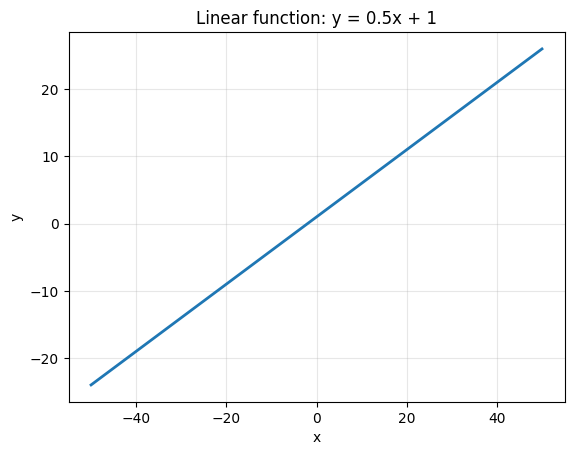

In [ ]:
import matplotlib.pyplot as plt

# Plot function y(x)
plt.title("Linear function: y = 0.5x + 1")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(x, y, linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

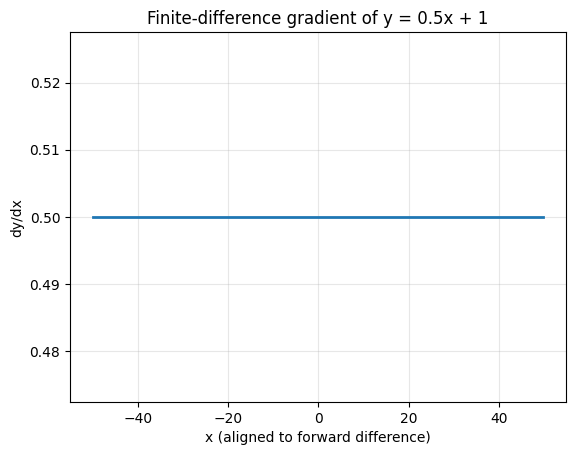

In [ ]:
# Plot gradient (aligned to x[:-1] for forward difference)
plt.title("Finite-difference gradient of y = 0.5x + 1")
plt.xlabel("x (aligned to forward difference)")
plt.ylabel("dy/dx")
plt.plot(x[:-1], gradient, linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

## 5. Reusable Gradient Function
This assignment requires creating a function that:
- Accepts a `function` mapping an ndarray `x` to an ndarray `y`
- Accepts an `x_range = (start, stop, step)` (default \(-50, 50.1, 0.1\))
- Returns the concatenated \((x, y)\) array and the finite-difference gradient


In [ ]:
def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    # Numerical gradient via finite differences
    start, stop, step = x_range
    x_vals = np.arange(start, stop, step)
    y_vals = function(x_vals)
    array_xy = np.column_stack([x_vals, y_vals])
    grad = np.diff(y_vals) / np.diff(x_vals)
    return array_xy, grad

## 6. Functions to Evaluate
Calculate gradients (step 0.1) and plot for:
1) \( y = x^2 \)  on \([-50, 50]\)  
2) \( y = 2x^2 + 2x \)  on \([-50, 50]\)  
3) \( y = \sin(x/2) \) on \([0, 50]\)  (uses `np.sin`)

In [ ]:
def f1(x):  # y = x^2
    return x**2

def f2(x):  # y = 2x^2 + 2x
    return 2*(x**2) + 2*x

def f3(x):  # y = sin(x/2), domain [0, 50]
    return np.sin(x / 2.0)

# Compute gradients with required ranges
xy1, grad1 = compute_gradient(f1, x_range=(-50, 50.1, 0.1))
xy2, grad2 = compute_gradient(f2, x_range=(-50, 50.1, 0.1))
xy3, grad3 = compute_gradient(f3, x_range=(0, 50.1, 0.1))

xy1.shape, grad1.shape, xy2.shape, grad2.shape, xy3.shape, grad3.shape

((1001, 2), (1000,), (1001, 2), (1000,), (501, 2), (500,))

## 7. Plots for Each Function
Draw charts similar to the linear example for each function.
Each function and its gradient are drawn as separate figures.


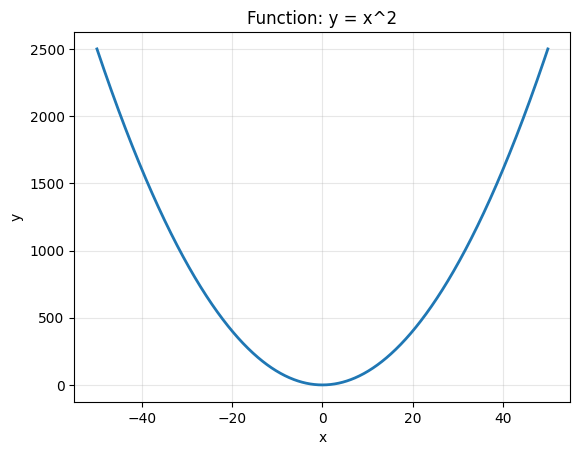

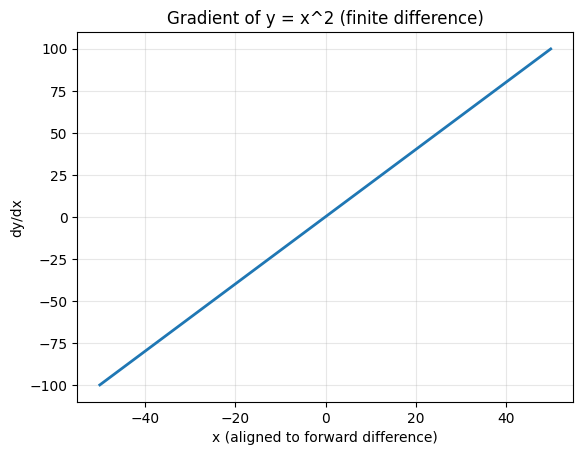

In [ ]:
# y = x^2
plt.title("Function: y = x^2")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy1[:,0], xy1[:,1], linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

plt.title("Gradient of y = x^2 (finite difference)")
plt.xlabel("x (aligned to forward difference)")
plt.ylabel("dy/dx")
plt.plot(xy1[:-1,0], grad1, linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

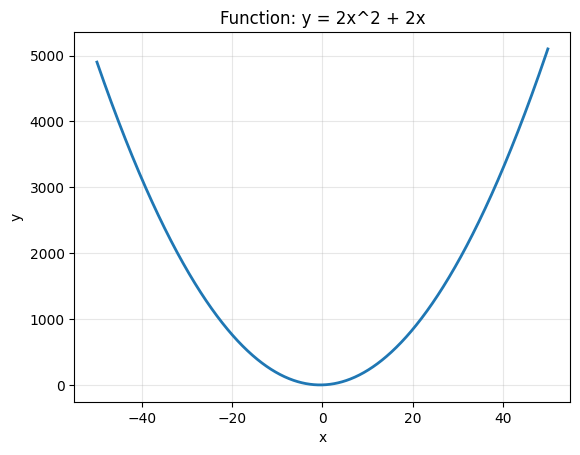

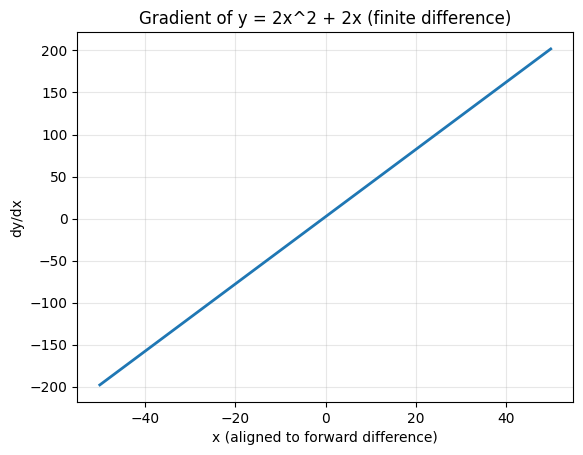

In [ ]:
# y = 2x^2 + 2x
plt.title("Function: y = 2x^2 + 2x")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy2[:,0], xy2[:,1], linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

plt.title("Gradient of y = 2x^2 + 2x (finite difference)")
plt.xlabel("x (aligned to forward difference)")
plt.ylabel("dy/dx")
plt.plot(xy2[:-1,0], grad2, linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

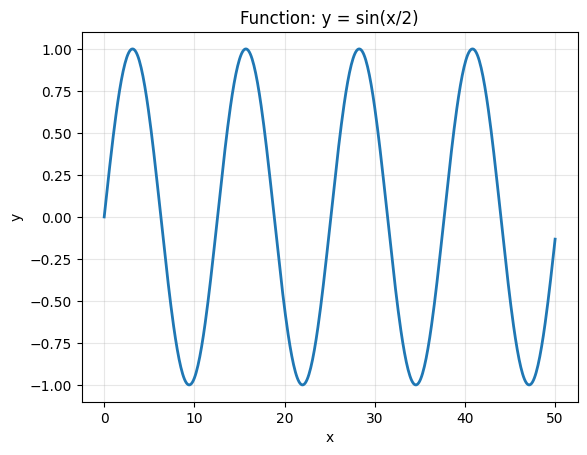

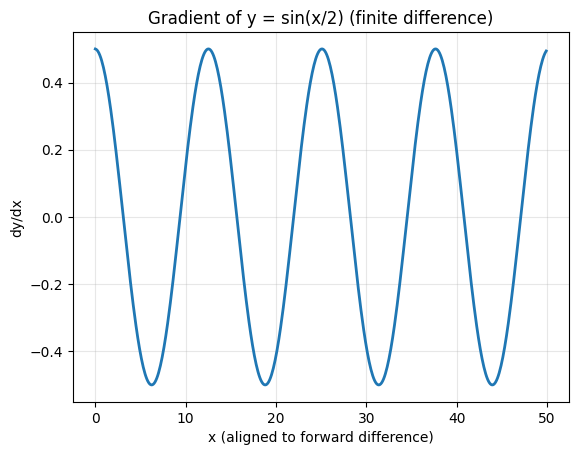

In [ ]:
# y = sin(x/2) for x in [0, 50]
plt.title("Function: y = sin(x/2)")
plt.xlabel("x")
plt.ylabel("y")
plt.plot(xy3[:,0], xy3[:,1], linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

plt.title("Gradient of y = sin(x/2) (finite difference)")
plt.xlabel("x (aligned to forward difference)")
plt.ylabel("dy/dx")
plt.plot(xy3[:-1,0], grad3, linewidth=2)
plt.grid(True, alpha=0.3)
plt.show()

## 8. Find Minimum Values (Using `min` and `argmin`)
Find for each function and domain:
- The minimum \(y\) value using `np.min`
- The index of the minimum using `np.argmin`
- The gradients **before** and **after** the minimum (where defined)

In [ ]:
def report_min_and_neighbor_grads(xy, grad):
    y_vals = xy[:,1]
    idx_min = int(np.argmin(y_vals))
    y_min = float(np.min(y_vals))
    x_min = float(xy[idx_min, 0])
    # Gradients are defined between points: grad[i] ~ (y[i+1]-y[i])/(x[i+1]-x[i])
    grad_before = grad[idx_min-1] if idx_min-1 >= 0 else None
    grad_after  = grad[idx_min]   if idx_min < len(grad) else None
    return x_min, y_min, idx_min, grad_before, grad_after

for name, xy, grad in [
    ("y = x^2", xy1, grad1),
    ("y = 2x^2 + 2x", xy2, grad2),
    ("y = sin(x/2)", xy3, grad3),
]:
    x_min, y_min, idx_min, g_before, g_after = report_min_and_neighbor_grads(xy, grad)
    print(f"{name}: min y = {y_min:.6f} at x = {x_min:.6f} (index {idx_min})")
    print(f"  gradient before: {g_before}")
    print(f"  gradient after : {g_after}")

y = x^2: min y = 0.000000 at x = 0.000000 (index 500)
  gradient before: -0.09999999999858034
  gradient after : 0.1000000000014225
y = 2x^2 + 2x: min y = -0.500000 at x = -0.500000 (index 495)
  gradient before: -0.1999999999971896
  gradient after : 0.20000000000281676
y = sin(x/2): min y = -0.999990 at x = 22.000000 (index 220)
  gradient before: -0.010285346568865924
  gradient after : 0.014709200746580789
